# Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix
)

In [2]:
#reading the dataset
df = pd.read_csv("Placement_data_full_class.csv")

# Preprocessing the data

we will be checking on the lists of head, tail, description, then go for checking on the shape, if not resizing needed and also checking for missing values.


In [3]:
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [4]:
df.tail(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
205,206,M,61.00,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,No,62.00,Mkt&Fin,56.81,Placed,250000.0
206,207,M,41.00,Central,42.0,Central,Science,60.0,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
207,208,M,83.33,Central,78.0,Others,Commerce,61.0,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55,Placed,300000.0
208,209,F,43.00,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN
209,210,M,62.00,Central,72.0,Central,Commerce,65.0,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.00,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.00,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.00,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.00,Mkt&HR,60.22,Not Placed,NaN


In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df.shape

(215, 15)

In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11500\3476029930.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


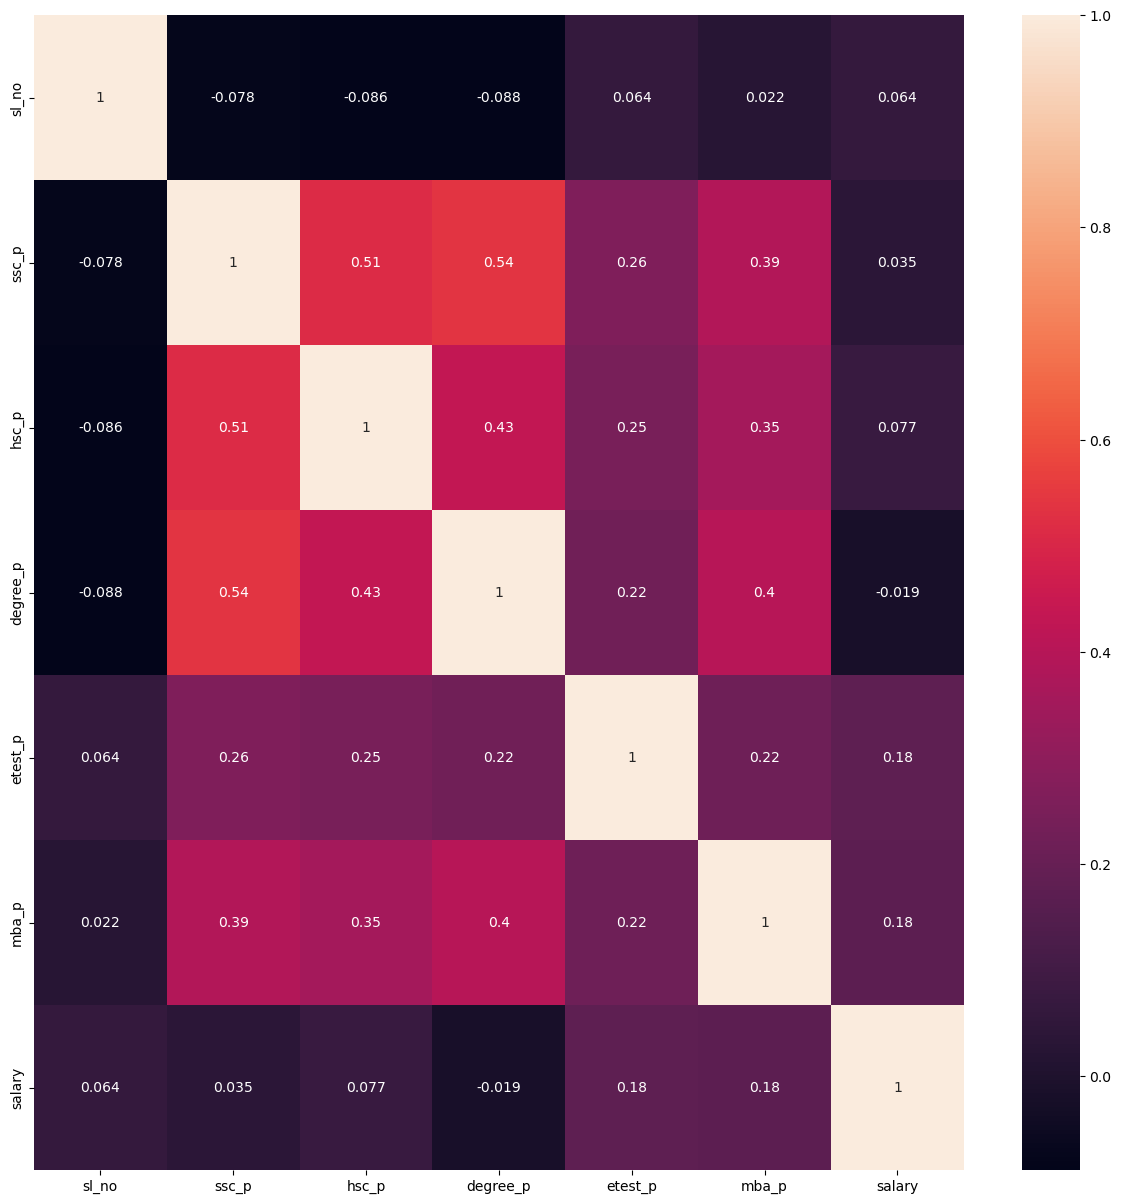

In [8]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
#dropping the unnecessary cols
df.drop(columns=["sl_no", "salary"], inplace=True) 

In [16]:
label_encoders = {}
for col in ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
X = df.drop(columns=['status'])
y = df['status']

# Training the model
1. splitting of data
2. choosing of Gradient Boosting as Classifier
3. scaled the data
4. and added GridSearchCV for hyperparameter tuning

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Evaluating the classification metrics
we will calculate:
1. accuracy_score
2. precision
3. recall
4. f1-score
5. confusion metrics

Accuracy: 0.8140
Precision: 0.8438
Recall: 0.9000
F1-Score: 0.8710

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.84      0.90      0.87        30

    accuracy                           0.81        43
   macro avg       0.79      0.76      0.77        43
weighted avg       0.81      0.81      0.81        43



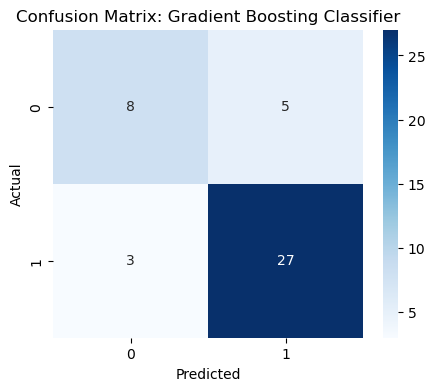

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Gradient Boosting Classifier")
plt.show()